In [48]:
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torch
from PIL import Image, ImageEnhance
import torchvision.transforms as transforms
from torchvision.utils import save_image, make_grid

In [2]:
latent_size = 128

In [3]:
generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 x 64 x 64
)

In [4]:
discriminator = nn.Sequential(
    # in: 3 x 64 x 64

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid())

In [5]:
import torch

# Define or load your model architectures
# Replace with your actual model class
# generator = Generator()  # Replace with your generator class definition
# discriminator = Discriminator()  # Replace with your discriminator class definition

# Load the saved state dictionaries
# generator.load_state_dict(torch.load('/kaggle/input/gan-weights/generator.pth'))
# Load model for CPU
generator.load_state_dict(torch.load('/kaggle/input/gan-weights-human-faces/generator.pth', map_location='cpu'))

discriminator.load_state_dict(torch.load('/kaggle/input/gan-weights-human-faces/discriminator.pth', map_location='cpu'))

print('Models loaded successfully.')


Models loaded successfully.


In [20]:
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [18]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

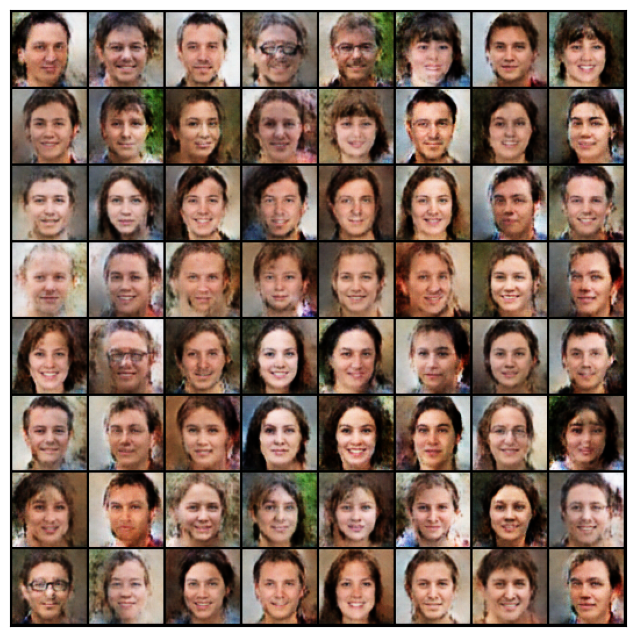

In [26]:
# temp_latent = torch.randn(64, latent_size, 1, 1, device=device)

temp_latent = torch.randn(64, latent_size, 1, 1, device='cpu')

show = 1
fake_images = generator(temp_latent)
fake_images = denorm(fake_images)
if show:
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

In [47]:
# Create a grid of images
image_grid = make_grid(fake_images.cpu().detach(), nrow=8)

# Save the grid as an image file
save_image(image_grid, 'fake_images_grid.png')


In [ ]:
# code for Chat GPT
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torch
from PIL import Image, ImageEnhance
import torchvision.transforms as transforms
from torchvision.utils import save_image, make_grid


latent_size = 128

generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 x 64 x 64
)


discriminator = nn.Sequential(
    # in: 3 x 64 x 64

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid())


generator.load_state_dict(torch.load('/kaggle/input/gan-weights-human-faces/generator.pth', map_location='cpu'))

discriminator.load_state_dict(torch.load('/kaggle/input/gan-weights-human-faces/discriminator.pth', map_location='cpu'))

print('Models loaded successfully.')

stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]


# temp_latent = torch.randn(64, latent_size, 1, 1, device=device)

temp_latent = torch.randn(64, latent_size, 1, 1, device='cpu')

fake_images = generator(temp_latent)
fake_images = denorm(fake_images)

# Create a grid of images
image_grid = make_grid(fake_images.cpu().detach(), nrow=8)

# Save the grid as an image file
save_image(image_grid, 'fake_images_grid.png')
